# 1. Tools and Dependencies

### Resources used in this project:
- Python https://www.python.org/
- Conda https://anaconda.cloud/getting-started-with-anaconda-individual-edition
- Jupyter Notebook https://jupyter.org/
- Tensorflow https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html
- Tensorflow Records https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#create-tensorflow-records
- OpenCV https://opencv.org/
- NumPy https://numpy.org/
- MediaPipe https://google.github.io/mediapipe/
- Scikit-Learn https://scikit-learn.org/stable/
- Matplotlib https://matplotlib.org/

In [1]:
#!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Define keypoints - MediaPipe Holistic

In [3]:
mp_holistic = mp.solutions.holistic                 
mp_drawing = mp.solutions.drawing_utils            

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                 
    results = model.process(image)               
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # face
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,128), thickness=1, circle_radius=1)
                             ) 
    # body
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)
                             ) 
    # left hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
# capture a sing to initialize, cv2.VideoCapture(num) where num is a device number - depends on the laptop used, macbook - 0, surface 1 
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Web Camera Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

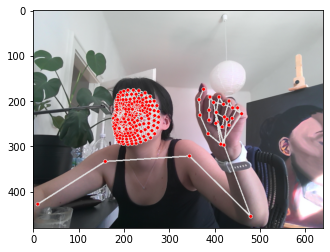

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Keypoints

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
# store key points as one array

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.29115894,  0.50301993, -0.56043851, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
np.save('test', result_test)

In [16]:
np.load('test.npy')

array([ 0.29115894,  0.50301993, -0.56043851, ...,  0.        ,
        0.        ,  0.        ])

# 4. Directory Structure Setup

In [17]:
# folder for data - each sign has its own folder (data/a, data/b, data/c, ect)
DATA_PATH = os.path.join('data') 

actions = np.array(['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y', '_','5'])

no_sequences = 300 # videos per sign

sequence_length = 10 # frames per sign

start_folder = 1

In [114]:
# create folder for each sign, each sign folder has separate folder to store separate stacks of frames
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect the data

In [116]:
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:

        for sequence in range(start_folder, start_folder+no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                # when "Start" is displayed a sign needs to be shown
                if frame_num == 0: 
                    cv2.putText(image, 'Start', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for symbol [{}] video number [{}]'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500) # pause between each video collection
                else: 
                    cv2.putText(image, 'Collecting frames for symbol [{}] video number [{}]'.format(action, sequence), (15,12), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels


In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'k': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'p': 14,
 'q': 15,
 'r': 16,
 's': 17,
 't': 18,
 'u': 19,
 'v': 20,
 'w': 21,
 'x': 22,
 'y': 23,
 '_': 24,
 '5': 25}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape

(7800, 10, 1662)

In [23]:
np.array(labels).shape

(7800,)

In [24]:
#labels

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(7800, 10, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(390, 26)

# 7. Build and Train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [31]:
# Log training
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
232/232 [==============================] - 12s 30ms/step - loss: 3.1700 - categorical_accuracy: 0.0584
Epoch 2/300
232/232 [==============================] - 5s 22ms/step - loss: 2.3789 - categorical_accuracy: 0.2451
Epoch 3/300
232/232 [==============================] - 5s 23ms/step - loss: 2.0313 - categorical_accuracy: 0.3569
Epoch 4/300
232/232 [==============================] - 6s 24ms/step - loss: 1.8041 - categorical_accuracy: 0.4264
Epoch 5/300
232/232 [==============================] - 5s 23ms/step - loss: 1.7026 - categorical_accuracy: 0.4496
Epoch 6/300
232/232 [==============================] - 6s 24ms/step - loss: 1.6342 - categorical_accuracy: 0.4749
Epoch 7/300
232/232 [==============================] - 6s 24ms/step - loss: 1.5357 - categorical_accuracy: 0.4926
Epoch 8/300
232/232 [==============================] - 6s 24ms/step - loss: 1.4793 - categorical_accuracy: 0.5228
Epoch 9/300
232/232 [==============================] - 6s 24ms/step - loss: 1.5333 - ca

232/232 [==============================] - 8s 33ms/step - loss: 0.3690 - categorical_accuracy: 0.8700 
Epoch 72/300
232/232 [==============================] - 8s 34ms/step - loss: 0.4368 - categorical_accuracy: 0.8501
Epoch 73/300
232/232 [==============================] - 8s 32ms/step - loss: 0.4447 - categorical_accuracy: 0.8411
Epoch 74/300
232/232 [==============================] - 8s 33ms/step - loss: 0.3778 - categorical_accuracy: 0.8658
Epoch 75/300
232/232 [==============================] - 8s 32ms/step - loss: 0.3961 - categorical_accuracy: 0.8513
Epoch 76/300
232/232 [==============================] - 8s 34ms/step - loss: 0.3643 - categorical_accuracy: 0.8704
Epoch 77/300
232/232 [==============================] - 8s 34ms/step - loss: 0.3500 - categorical_accuracy: 0.8775
Epoch 78/300
232/232 [==============================] - 8s 35ms/step - loss: 0.3221 - categorical_accuracy: 0.8841
Epoch 79/300
232/232 [==============================] - 8s 35ms/step - loss: 0.3823 - catego

Epoch 142/300
232/232 [==============================] - 8s 36ms/step - loss: 0.1826 - categorical_accuracy: 0.9315
Epoch 143/300
232/232 [==============================] - 8s 36ms/step - loss: 0.3648 - categorical_accuracy: 0.8799
Epoch 144/300
232/232 [==============================] - 8s 35ms/step - loss: 0.2299 - categorical_accuracy: 0.9198
Epoch 145/300
232/232 [==============================] - 8s 34ms/step - loss: 0.1930 - categorical_accuracy: 0.9334
Epoch 146/300
232/232 [==============================] - 8s 35ms/step - loss: 0.1922 - categorical_accuracy: 0.9300
Epoch 147/300
232/232 [==============================] - 8s 35ms/step - loss: 0.2481 - categorical_accuracy: 0.9132
Epoch 148/300
232/232 [==============================] - 8s 34ms/step - loss: 0.1813 - categorical_accuracy: 0.9357
Epoch 149/300
232/232 [==============================] - 8s 34ms/step - loss: 0.1978 - categorical_accuracy: 0.9341
Epoch 150/300
232/232 [==============================] - 8s 34ms/step - 

232/232 [==============================] - 8s 33ms/step - loss: 0.1760 - categorical_accuracy: 0.9398
Epoch 213/300
232/232 [==============================] - 8s 34ms/step - loss: 0.1571 - categorical_accuracy: 0.9399
Epoch 214/300
232/232 [==============================] - 8s 34ms/step - loss: 0.1951 - categorical_accuracy: 0.9301
Epoch 215/300
232/232 [==============================] - 8s 33ms/step - loss: 0.1384 - categorical_accuracy: 0.9495
Epoch 216/300
232/232 [==============================] - 8s 35ms/step - loss: 0.2297 - categorical_accuracy: 0.9171
Epoch 217/300
232/232 [==============================] - 8s 34ms/step - loss: 0.2112 - categorical_accuracy: 0.9271
Epoch 218/300
232/232 [==============================] - 8s 35ms/step - loss: 0.1245 - categorical_accuracy: 0.9598
Epoch 219/300
232/232 [==============================] - 8s 33ms/step - loss: 0.1431 - categorical_accuracy: 0.9511
Epoch 220/300
232/232 [==============================] - 8s 34ms/step - loss: 0.2308 -

232/232 [==============================] - 9s 38ms/step - loss: 0.0714 - categorical_accuracy: 0.9742
Epoch 283/300
232/232 [==============================] - 9s 39ms/step - loss: 0.1064 - categorical_accuracy: 0.9592
Epoch 284/300
232/232 [==============================] - 9s 39ms/step - loss: 0.1111 - categorical_accuracy: 0.9618
Epoch 285/300
232/232 [==============================] - 9s 38ms/step - loss: 0.0912 - categorical_accuracy: 0.9655
Epoch 286/300
232/232 [==============================] - 9s 38ms/step - loss: 0.1160 - categorical_accuracy: 0.9585
Epoch 287/300
232/232 [==============================] - ETA: 0s - loss: 0.1345 - categorical_accuracy: 0.95 - 11s 48ms/step - loss: 0.1343 - categorical_accuracy: 0.9542
Epoch 288/300
232/232 [==============================] - 9s 39ms/step - loss: 0.0600 - categorical_accuracy: 0.9781
Epoch 289/300
232/232 [==============================] - 9s 38ms/step - loss: 0.1182 - categorical_accuracy: 0.9609
Epoch 290/300
232/232 [========

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                858       
Total params: 597,434
Trainable params: 597,434
Non-trainable params: 0
__________________________________________________

# 8. Test Predictions

In [36]:
res = model.predict(X_test)

In [37]:
actions[np.argmax(res[4])]

'n'

In [38]:
actions[np.argmax(y_test[4])]

'n'

# 9. Save Model

In [39]:
model.save('dev-vNext-300e.h5')

In [40]:
#del model

In [41]:
model.load_weights('dev-vNext-300e.h5')

In [42]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [43]:
yhat = model.predict(X_test)

In [44]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [45]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[370,  12],
        [  1,   7]],

       [[380,   0],
        [  6,   4]],

       [[374,   2],
        [  3,  11]],

       [[371,   4],
        [  4,  11]],

       [[369,   7],
        [  6,   8]],

       [[382,   0],
        [  5,   3]],

       [[369,   2],
        [  1,  18]],

       [[377,   0],
        [  1,  12]],

       [[368,   3],
        [  1,  18]],

       [[375,   5],
        [  2,   8]],

       [[366,   3],
        [  1,  20]],

       [[373,   1],
        [  1,  15]],

       [[374,   1],
        [  2,  13]],

       [[373,   1],
        [  3,  13]],

       [[376,   0],
        [  0,  14]],

       [[368,   1],
        [  0,  21]],

       [[371,   6],
        [  1,  12]],

       [[376,   1],
        [  1,  12]],

       [[367,   1],
        [  3,  19]],

       [[375,   2],
        [  1,  12]],

       [[376,   2],
        [  3,   9]],

       [[377,   1],
        [  5,   7]],

       [[372,   0],
        [  0,  18]],

       [[371,   0],
        [  0, 

In [48]:
accuracy_score(ytrue, yhat)

In [49]:
colors = [(200,120,16), (120,245,16), (16,120,245), (200,120,16), (120,245,16), (16,120,245), (200,120,16), (120,200,16), (16,120,200),
         (200,120,16), (120,245,16), (16,120,245), (200,120,16), (120,245,16), (16,120,245), (200,120,16), (120,200,16), (16,120,200),
         (200,120,16), (120,245,16), (16,120,245), (200,120,16), (120,245,16), (16,120,245), (200,120,16), (120,200,16), (16,120,200)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [74]:
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.80, min_tracking_confidence=0.90) as holistic:
    while cap.isOpened():

        # feed
        ret, frame = cap.read()

        # detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # landmarks
        draw_styled_landmarks(image, results)
        
        # prediction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            if np.array(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        
        cv2.imshow('Life feed', image)

        # break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
o
<class 'mediapipe.python.solution_base.SolutionOutputs'>
o
<class 'mediapipe.python.solution_base.SolutionOutputs'>
o
<class 'mediapipe.python.solution_base.SolutionOutputs'>
o
<class 'mediapipe.python.solution_base.SolutionOutputs'>
o
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>

h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
l
<class 'mediapipe.python.solution_base.SolutionOutputs'>
l
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
o
<class 'mediapipe.python.solution_base.SolutionOutputs'>
l
<class 'mediapipe.python.solution_base.SolutionOutputs'>
l
<class 'mediapipe.python.solution_base.SolutionOutputs'>
l
<class 'mediapipe.python.solution_base.SolutionOutputs'>
l
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r
<class 'mediapipe.python.solution_base.SolutionOutputs'>

d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs